# Task 7: YouTube-Based Learning Task

### Step 1: Load and Explore Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('ds_salaries.csv')

# Display shape and basic info
print("Dataset Shape:", df.shape)
print("\nInfo:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Unique job titles
print("\nNumber of Unique Job Titles:", df['job_title'].nunique())

Dataset Shape: (607, 12)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB
None

Summary Statistics:
       Unnamed: 0    work_year        salary  salary_in_usd  remote_ratio
count  607.000000   607.000000  6.070000

### Step 2: Clean the Data

In [2]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Drop duplicates
df.drop_duplicates(inplace=True)

# Map codes to readable values
df['experience_level'] = df['experience_level'].map({
    'EN': 'Entry', 'MI': 'Mid', 'SE': 'Senior', 'EX': 'Executive'
})
df['employment_type'] = df['employment_type'].map({
    'FT': 'Full-time', 'PT': 'Part-time', 'CT': 'Contract', 'FL': 'Freelance'
})
df['remote_ratio'] = df['remote_ratio'].map({
    0: 'On-site', 50: 'Hybrid', 100: 'Remote'
})



Missing Values:
 Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


### Step 3: Exploratory Data Analysis

C:\Users\Yogesh Verma\AppData\Local\Temp\ipykernel_16232\2873396046.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.values, y=top10.index, palette='viridis')


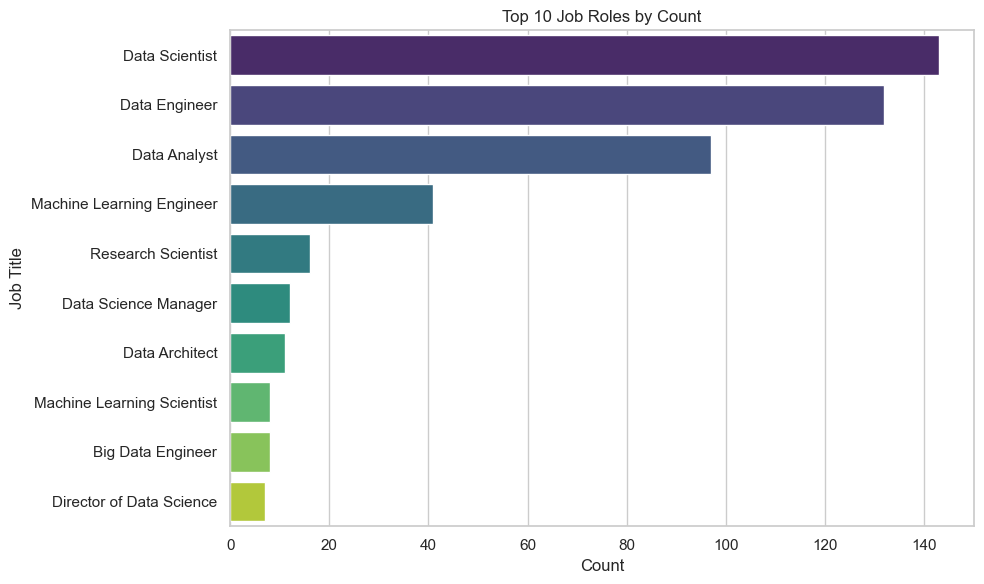

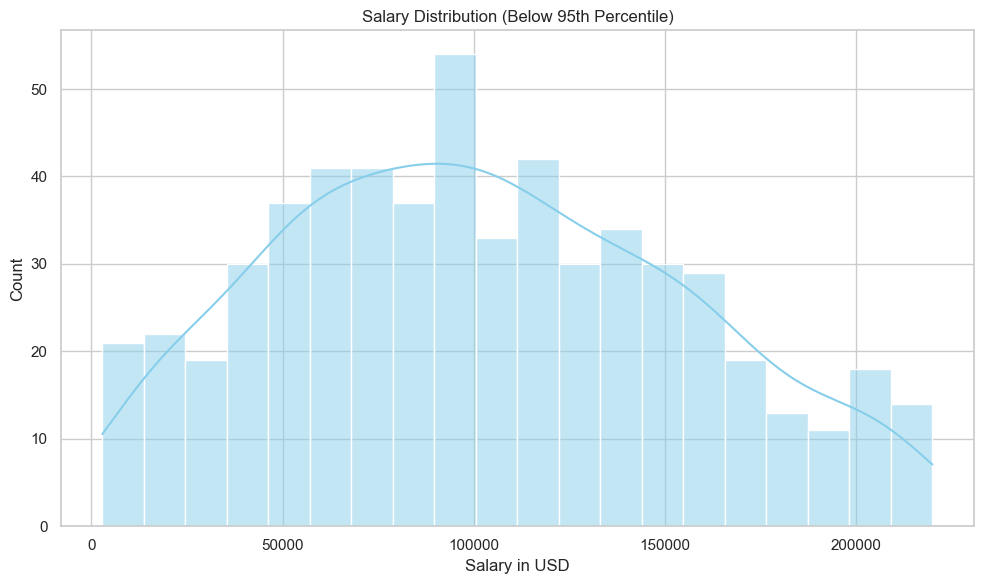

C:\Users\Yogesh Verma\AppData\Local\Temp\ipykernel_16232\2873396046.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_job.values, y=avg_salary_job.index, palette='plasma')


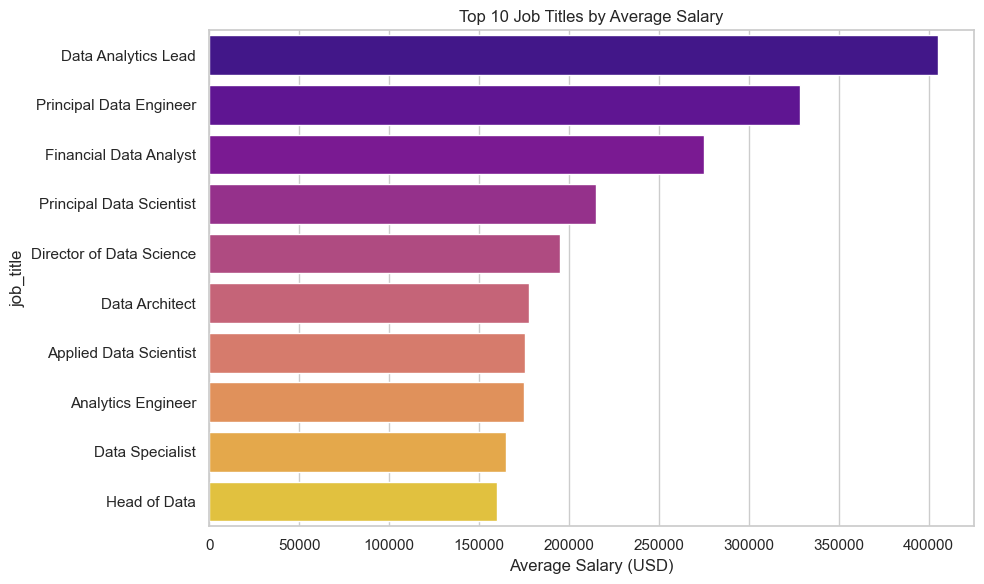

C:\Users\Yogesh Verma\AppData\Local\Temp\ipykernel_16232\2873396046.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_exp.index, y=avg_salary_exp.values, palette='magma')


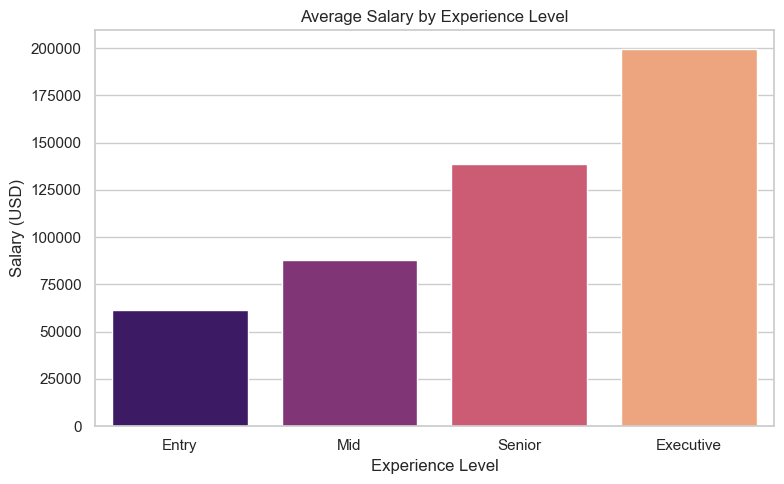

C:\Users\Yogesh Verma\AppData\Local\Temp\ipykernel_16232\2873396046.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_remote.index, y=avg_salary_remote.values, palette='coolwarm')


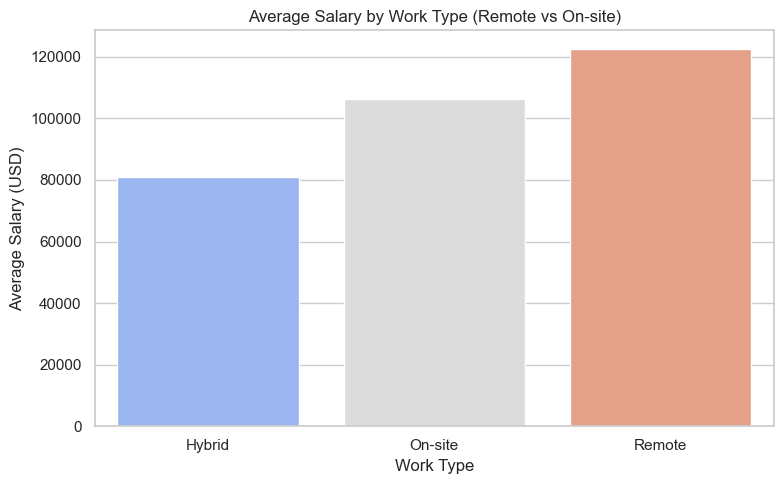

C:\Users\Yogesh Verma\AppData\Local\Temp\ipykernel_16232\2873396046.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='coolwarm')


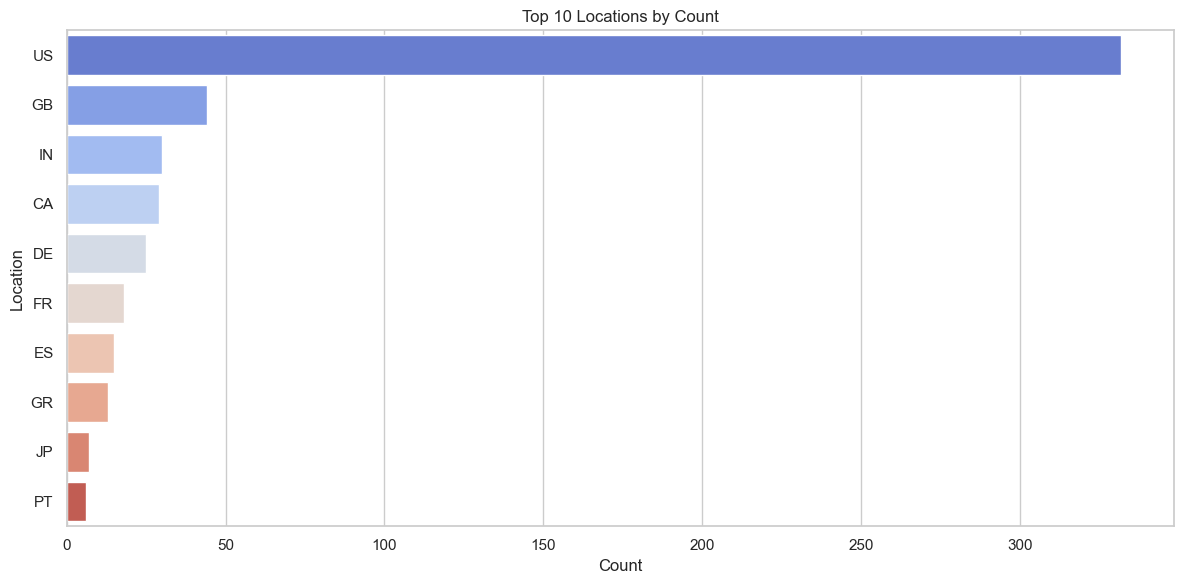

C:\Users\Yogesh Verma\AppData\Local\Temp\ipykernel_16232\2873396046.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='experience_level', y='salary_in_usd', palette='pastel')


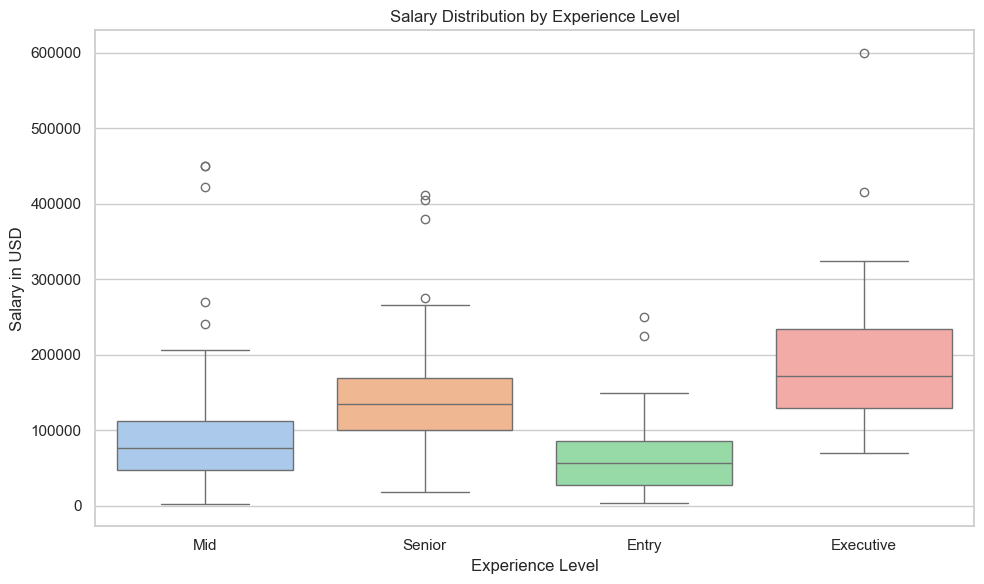

C:\Users\Yogesh Verma\AppData\Local\Temp\ipykernel_16232\2873396046.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_size.index, y=avg_salary_size.values, palette='Set2')


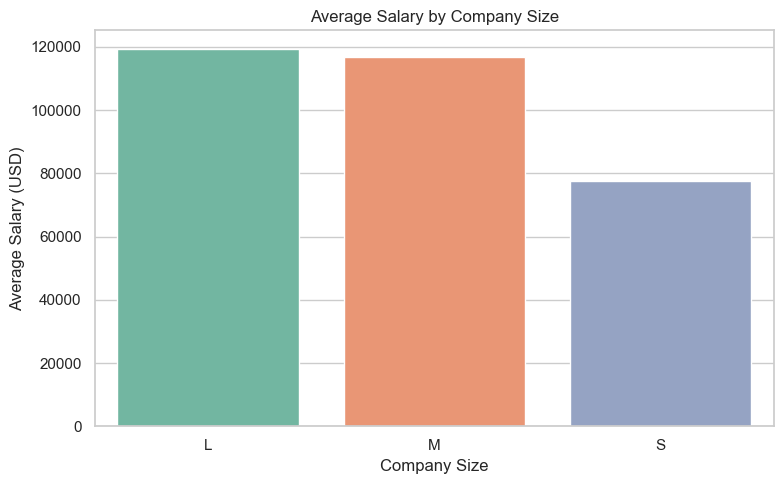

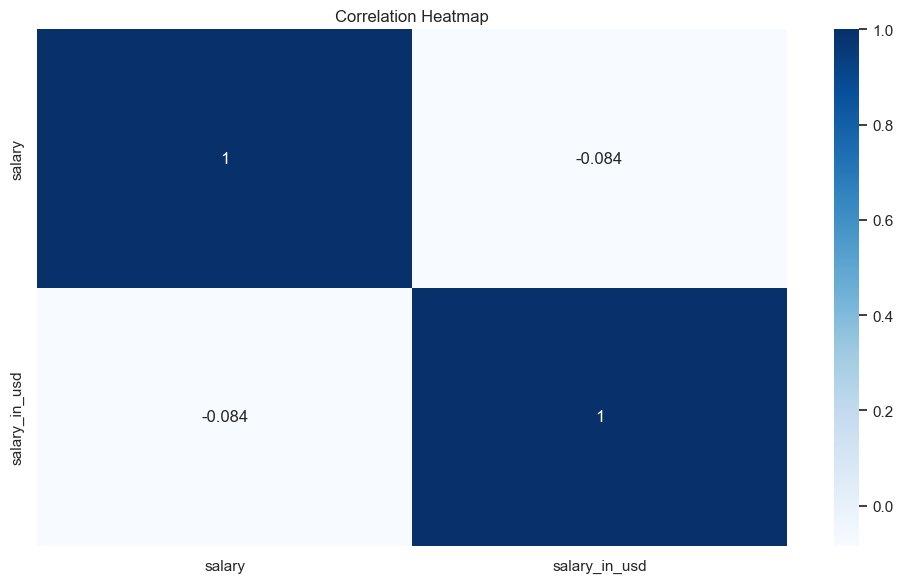

In [6]:
# Set seaborn theme
sns.set(style="whitegrid")

# Top 10 Job Titles
plt.figure(figsize=(10, 6))
top10 = df['job_title'].value_counts().nlargest(10)
sns.barplot(x=top10.values, y=top10.index, palette='viridis')
plt.title('Top 10 Job Roles by Count')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

# Salary distribution (<95th percentile to remove outliers)
plt.figure(figsize=(10, 6))
sns.histplot(df[df.salary_in_usd < df.salary_in_usd.quantile(0.95)].salary_in_usd,
             bins=20, kde=True, color='skyblue')
plt.title('Salary Distribution (Below 95th Percentile)')
plt.xlabel('Salary in USD')
plt.tight_layout()
plt.show()

# Average salary by top 10 job titles
plt.figure(figsize=(10, 6))
avg_salary_job = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_salary_job.values, y=avg_salary_job.index, palette='plasma')
plt.title('Top 10 Job Titles by Average Salary')
plt.xlabel('Average Salary (USD)')
plt.tight_layout()
plt.show()

# Experience level vs salary
plt.figure(figsize=(8, 5))
avg_salary_exp = df.groupby('experience_level')['salary_in_usd'].mean().sort_values()
sns.barplot(x=avg_salary_exp.index, y=avg_salary_exp.values, palette='magma')
plt.title('Average Salary by Experience Level')
plt.ylabel('Salary (USD)')
plt.xlabel('Experience Level')
plt.tight_layout()
plt.show()

# Remote status vs salary
plt.figure(figsize=(8, 5))
avg_salary_remote = df.groupby('remote_ratio')['salary_in_usd'].mean()
sns.barplot(x=avg_salary_remote.index, y=avg_salary_remote.values, palette='coolwarm')
plt.title('Average Salary by Work Type (Remote vs On-site)')
plt.ylabel('Average Salary (USD)')
plt.xlabel('Work Type')
plt.tight_layout()
plt.show()



# Countplot for top locations
plt.figure(figsize=(12, 6))
top_locations = df['employee_residence'].value_counts().nlargest(10)
sns.barplot(x=top_locations.values, y=top_locations.index, palette='coolwarm')
plt.title('Top 10 Locations by Count')
plt.xlabel('Count')
plt.ylabel('Location')
plt.tight_layout()
plt.show()

# Boxplot for salary distribution by experience level
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='experience_level', y='salary_in_usd', palette='pastel')
plt.title('Salary Distribution by Experience Level')
plt.ylabel('Salary in USD')
plt.xlabel('Experience Level')
plt.tight_layout()
plt.show()

# Barplot: Company size vs salary
plt.figure(figsize=(8, 5))
avg_salary_size = df.groupby('company_size')['salary_in_usd'].mean().sort_values(ascending=False)
sns.barplot(x=avg_salary_size.index, y=avg_salary_size.values, palette='Set2')
plt.title('Average Salary by Company Size')
plt.ylabel('Average Salary (USD)')
plt.xlabel('Company Size')
plt.tight_layout()
plt.show()

# Heatmap for correlations
plt.figure(figsize=(10, 6))
num_df = df[['salary', 'salary_in_usd']]
sns.heatmap(num_df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


### Step 4: Key Insights


**1. Top 10 Job Roles by Frequency**
- Data Scientist, Data Engineer, and Data Analyst are the most common roles.
- These three collectively dominate the data job market in 2023.

**2. Salary Distribution**
- The majority of salaries lie between $60,000 and $150,000.
- The distribution shows a slight right skew, indicating a few high-paying outliers (removed for this plot).
- Most professionals earn in the $90k–$120k range.

**3. Top Job Titles by Average Salary**

*Highest paying roles include:*
- Data Analytics Lead (~$410k)
- Principal Data Engineer (~$330k)
- Financial Data Analyst (~$270k)

These roles are fewer in count but command premium pay, often due to strategic and leadership responsibilities.

**4. Experience Level vs Average Salary**

*Clear positive trend:*
- Entry: ~$60,000
- Mid: ~$88,000
- Senior: ~$138,000
- Executive: ~$199,000

Experience strongly correlates with higher salaries in data roles.

**5. Remote vs On-site Salaries**

*Average salary by work type:*
- Remote: ~$122k
- On-site: ~$106k
- Hybrid: ~$81k

Remote roles tend to offer higher compensation, possibly due to global hiring and higher efficiency.

**6. Company Size vs Salary**
- Large (L) and Medium (M) sized companies offer the highest average salaries.
- Small (S) companies offer significantly lower average pay (~$77k), possibly due to limited resources or early-stage funding.

**7. Correlation Insights**
- Minimal correlation between salary and salary_in_usd (~ -0.084), which may reflect that one of the columns is being standardized or transformed.
- No strong linear relationship observed — additional features may be needed for predictive modeling.

**8. Salary Distribution by Experience**

*Median salary clearly increases with experience level:*
- Entry: Wide range but lower median (~$60k)
- Mid: Higher and more stable (~$90–$100k)
- Senior: Higher spread with more 6-figure salaries
- Executive: Highest median and largest spread, some reaching $600k+

Outliers are present in each category, especially at senior and executive levels.